In [1]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

with open('./stopwords.txt') as stopwords:
    stopwords=stopwords.read().split('\n')

In [4]:
#additional_stop_words=['apple','nokia','oneplus','realme','samsung','xiaomi','huawei','blackberry','license','service','software','agreement','agreements','user','application','content']

In [14]:
#Additional document specific stopwords 
additional_stop_words=['apple','nokia','oneplus','realme','samsung','xiaomi','huawei','blackberry']

#def tokenize_list(doc):
#    word_list=[]
#    for word in doc.split(' '):
#        word_list.append(word)
#    #stemmer = SnowballStemmer("english")
#    token_list=[]
#    for word_token in gensim.utils.simple_preprocess(doc):
#        if word_token not in gensim.parsing.preprocessing.STOPWORDS:
#            token_list.append((WordNetLemmatizer().lemmatize(word_token,pos='v')))
#    return token_list

#word2vecModel=gensim.models.Word2Vec.load('word2vecModel')
#dictionary = corpora.Dictionary()
#BoW_corpus = [dictionary.doc2bow(tokenize_list(doc_reader[file]), allow_update=True) for file in files]
#for doc in BoW_corpus:
#    print([[dictionary[id], freq] for id, freq in doc])

#Function to tokenize documents
def tokenize(doc):
    word_list=[]
    for word in doc.split(' '):
        word_list.append(word)
    #stemmer = SnowballStemmer("english")
    token_list=[]
    for word_token in gensim.utils.simple_preprocess(doc):
        if word_token not in gensim.parsing.preprocessing.STOPWORDS and word_token not in stopwords and word_token not in additional_stop_words:
            token_list.append((WordNetLemmatizer().lemmatize(word_token,pos='v')))
    stoppedTokens = [i for i in token_list]
    return ' '.join(stoppedTokens)

#Importing dataset
import os
files=os.listdir('./data')


doc_reader={}
for file in files:
    with open('./data/'+file,encoding='utf-8') as f:
        doc_reader[file]=f.read()

In [15]:
doc_reader

{'AppleEndUser.txt': 'LICENSED APPLICATION END USER LICENSE AGREEMENT\nApps made available through the App Store are licensed, not sold, to you. Your license to each App is subject to your prior acceptance of either this Licensed Application End User License Agreement (“Standard EULA”), or a custom end user license agreement between you and the Application Provider (“Custom EULA”), if one is provided. Your license to any Apple App under this Standard EULA or Custom EULA is granted by Apple, and your license to any Third Party App under this Standard EULA or Custom EULA is granted by the Application Provider of that Third Party App. Any App that is subject to this Standard EULA is referred to herein as the “Licensed Application.” The Application Provider or Apple as applicable (“Licensor”) reserves all rights in and to the Licensed Application not expressly granted to you under this Standard EULA.\n\na. Scope of License: Licensor grants to you a nontransferable license to use the Licens

AppleEndUser.txt 9606
BlackberryEndUser.txt 8837
HuaweiEndUser.txt 25636
nokia-agreement.txt 25140
OneplusUser.txt 15554
RealMeEndUser.txt 18114
SamsungEndUser.txt 19188
XiaomiEndUser.txt 20443
723
683
2046
1988
1242
1384
1544
1583


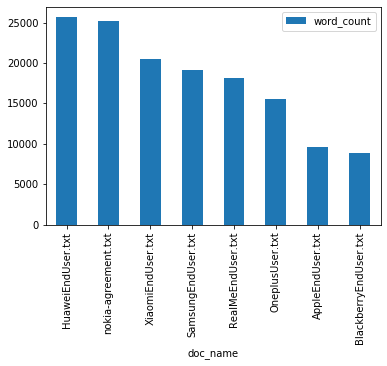

In [6]:
# count by document
doc_name=[]
word_count=[]

for key,value in doc_reader.items():
    print(key, sum(1 for v in value if v))
    doc_name.append(key)
    word_count.append(sum(1 for v in value if v))
    
doc_words=pd.DataFrame({'doc_name':doc_name,'word_count':word_count})

doc_words

sorted_docs=doc_words.sort_values(by='word_count',ascending=False)
sorted_docs.plot.bar(x='doc_name', y='word_count')


def tokenize_list(doc):
    word_list=[]
    for word in doc.split(' '):
        word_list.append(word)
    #stemmer = SnowballStemmer("english")
    token_list=[]
    for word_token in gensim.utils.simple_preprocess(doc):
        if word_token not in gensim.parsing.preprocessing.STOPWORDS:
            token_list.append((WordNetLemmatizer().lemmatize(word_token,pos='v')))
    return token_list

#number of tokens by file
for file in files:
    print(len(tokenize_list(doc_reader[file])))

In [3]:
f = open('vocab.txt', 'w+')
f.write(' ')
for file in files:
    f.write(tokenize(doc_reader[file]))
f.close()

#model = gensim.models.Word2Vec()
#trainSentences = gensim.models.word2vec.LineSentence('./vocab.txt')
#model.build_vocab(trainSentences)
#model.train(trainSentences,total_examples=model.corpus_count,epochs=model.iter)
#model.save('word2vecModel')

#word2vecModel=gensim.models.Word2Vec.load('word2vecModel')
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') 

doc_set = []
with open('./vocab.txt') as f:
    doc_set.append(f.read())

# list for tokenized documents in loop
texts = []
for i in doc_set:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)


    # stem tokens
    # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    # add tokens to list
    texts.append(tokens)

    # turn our tokenized documents into a id <-> term dictionary
dictL = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corp = [dictL.doc2bow(text) for text in texts]

for doc in corp:
    print([[dictL[id], freq] for id, freq in doc])

[['abridge', 1], ['abuse', 4], ['abusive', 1], ['accept', 16], ['acceptable', 1], ['acceptance', 4], ['access', 66], ['accessible', 1], ['accessories', 1], ['accidental', 1], ['accompany', 12], ['accordance', 19], ['account', 80], ['accountable', 1], ['accuracy', 16], ['accurate', 2], ['achieve', 2], ['acknowledge', 29], ['acquire', 7], ['act', 16], ['action', 17], ['activate', 3], ['activation', 1], ['activities', 15], ['activity', 5], ['actual', 1], ['adapt', 2], ['add', 2], ['addition', 8], ['additional', 14], ['additions', 1], ['address', 16], ['addressee', 1], ['adequate', 1], ['adjustments', 2], ['administrative', 2], ['adopt', 1], ['adults', 1], ['advance', 1], ['advertise', 7], ['advertisement', 2], ['advertisements', 9], ['advertisers', 2], ['advice', 3], ['advise', 4], ['affect', 12], ['affiliate', 30], ['affiliation', 1], ['afford', 1], ['aforementioned', 2], ['age', 5], ['agency', 2], ['agent', 3], ['agents', 4], ['aggregate', 1], ['agree', 82], ['agreement', 208], ['agreem

In [9]:
len(texts)

1

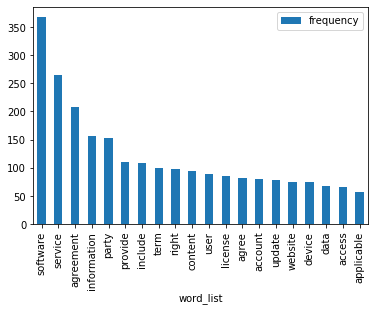

In [11]:
#Top tokens in the documents
word_list=[]
frequency=[]
for doc in corp:
    for id,freq in doc:
        word_list.append(dictL[id])
        frequency.append(freq)
        
word_tokens=pd.DataFrame({'word_list':word_list,'frequency':frequency})

word_tokens

filtered=word_tokens.sort_values(by='frequency',ascending=False).head(20)

filtered.plot.bar(x='word_list', y='frequency')

In [12]:
lda_model = gensim.models.LdaMulticore(corp, num_topics=10, id2word=dictL, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"software" + 0.016*"service" + 0.013*"party" + 0.010*"term" + 0.009*"information" + 0.009*"agreement" + 0.008*"provide" + 0.007*"content" + 0.007*"include" + 0.007*"device"
Topic: 1 
Words: 0.026*"software" + 0.019*"service" + 0.017*"agreement" + 0.015*"party" + 0.011*"information" + 0.009*"content" + 0.009*"include" + 0.009*"provide" + 0.008*"agree" + 0.008*"right"
Topic: 2 
Words: 0.028*"software" + 0.017*"agreement" + 0.013*"service" + 0.011*"information" + 0.010*"party" + 0.009*"provide" + 0.009*"include" + 0.007*"license" + 0.007*"term" + 0.006*"website"
Topic: 3 
Words: 0.034*"software" + 0.026*"service" + 0.015*"agreement" + 0.013*"information" + 0.012*"party" + 0.011*"include" + 0.010*"account" + 0.009*"right" + 0.008*"provide" + 0.008*"license"
Topic: 4 
Words: 0.036*"software" + 0.026*"service" + 0.021*"agreement" + 0.016*"information" + 0.015*"party" + 0.011*"provide" + 0.010*"include" + 0.010*"term" + 0.010*"right" + 0.009*"content"
Topic: 5 
Words: 0

In [25]:
corp

[[(0, 1),
  (1, 4),
  (2, 1),
  (3, 16),
  (4, 1),
  (5, 4),
  (6, 66),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 12),
  (11, 19),
  (12, 80),
  (13, 1),
  (14, 16),
  (15, 2),
  (16, 2),
  (17, 29),
  (18, 7),
  (19, 16),
  (20, 17),
  (21, 3),
  (22, 1),
  (23, 15),
  (24, 5),
  (25, 1),
  (26, 2),
  (27, 2),
  (28, 8),
  (29, 14),
  (30, 1),
  (31, 16),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 7),
  (40, 2),
  (41, 9),
  (42, 2),
  (43, 3),
  (44, 4),
  (45, 12),
  (46, 30),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 5),
  (51, 2),
  (52, 3),
  (53, 4),
  (54, 1),
  (55, 82),
  (56, 208),
  (57, 7),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 4),
  (65, 1),
  (66, 5),
  (67, 1),
  (68, 2),
  (69, 3),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 13),
  (84, 2),
  (85, 57),
  (86, 50),
  (87, 13),
  (88, 33),
  (89, 3)

In [26]:
#Applying tf-idf
tfidf = models.TfidfModel(corp)
corpus_tfidf = tfidf[corp]
for doc in corpus_tfidf:
    print(doc)
    


[]


In [21]:
def getTopicsWithNormalizedWeight(model):
    topicCoherencePair = dict()
    #print(model.print_topics(num_topics=5))
    topics = list()
    for mdl in model.print_topics(num_topics=5):
        tokenList = list()
        #print(mdl)
        mdl=str(mdl)[1:-1]
        valL = mdl.split(' + ')
        for pair in valL[1:]:
            #print(pair[:5])
            val = float(pair[:5])
            topic = pair[6:]
            tokenList.append(topic)
            if topic in topicCoherencePair:
                topicCoherencePair[topic] += val
            else:
                topicCoherencePair[topic] = val
        topics.append(tokenList)

    # normalize the topics
    norm = 0
    for topic, val in topicCoherencePair.items():
        norm += val

    for topic, val in topicCoherencePair.items():
        topicCoherencePair[topic] = val / norm

    return topics

topics = getTopicsWithNormalizedWeight(lda_model)

clean_topics=[]
for topic in topics:
    clean_topics.append([word.replace("\"","") for word in topic])
    
clean_topics

In [25]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim import corpora, models
import importlib


#importlib.reload(sys)
#sys.setdefaultencoding('utf8')
tokenizer_old = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer = RegexpTokenizer(r'\w+')

#inputSrc = './SonyEndUser.txt'
minTokenNum = 3
tokenList = list()
sentenceList = list()

r = re.compile('[A-Za-z]+')
deleteSet = set(['a', 'an', 'and', 'or', 'the'])
with open('./SonyEndUser.txt',encoding='utf-8') as f:
    doc=f.read()
#text = 'this assignment service information provide agree. Read this Agreement carefully before installing, downloading, or using the Software. By clicking on the "I Accept" button while installing, downloading, and/or using the Software, You agree to the terms and conditions of this Agreement. If You do not agree to all of the terms and conditions of this Agreement, promptly click the "Decline" or "I Do Not Accept" button, cancel the installation or downloading, or destroy or return the Software and accompanying documentation to Sony Mobile. YOU AGREE THAT YOUR USE OF THE SOFTWARE ACKNOWLEDGES THAT YOU HAVE READ THIS AGREEMENT, UNDERSTAND IT, AND AGREE TO BE BOUND BY ITS TERMS AND CONDITIONS.'


def tokenize_cpy(ct):
    # modify this function for different strategies of tokenizing
    # remove greek numbers, preps,
    # all words should be small case.
    resultSentences = list()
    sentences = tokenizer_old.tokenize(ct)
    for sentence in sentences:
        tokens = r.findall(sentence.lower())
        resultSentences.append(" ".join([token for token in tokens if token not in deleteSet]))

    return resultSentences


sentences = tokenize_cpy(doc)
sentences

['end user license agreement this software agreement agreement is between you either individual entity end user sony mobile communications inc sony mobile',
 'agreement authorizes you to use software specified in clause below which may be stored on cd rom sent to you by electronic mail downloaded from sony mobile s web pages servers from other sources solely under terms conditions set forth below',
 'this is agreement on end user rights not agreement for sale',
 'except as provided elsewhere in this agreement sony mobile its licensors continues to own copy of software physical media contained in sales package any other copy that you are authorized to make pursuant to this agreement',
 'read this agreement carefully before installing downloading using software',
 'by clicking on i accept button while installing downloading using software you agree to terms conditions of this agreement',
 'if you do not agree to all of terms conditions of this agreement promptly click decline i do not ac

In [26]:
minTokenNum = 3
tokenList = list()
sentenceList = list()

for sentence in sentences:
    tmpTokens = sentence.split()
    for topic in clean_topics:
        tokens = list()
        for token in tmpTokens:
            if token in topic:
                tokens.append(token)
        if len(tokens) >= minTokenNum:
            break
        else:
            tokenList.append(tokens)
            if sentence not in sentenceList:
                sentenceList.append(sentence)
                
sentenceList

['agreement authorizes you to use software specified in clause below which may be stored on cd rom sent to you by electronic mail downloaded from sony mobile s web pages servers from other sources solely under terms conditions set forth below',
 'this is agreement on end user rights not agreement for sale',
 'except as provided elsewhere in this agreement sony mobile its licensors continues to own copy of software physical media contained in sales package any other copy that you are authorized to make pursuant to this agreement',
 'read this agreement carefully before installing downloading using software',
 'by clicking on i accept button while installing downloading using software you agree to terms conditions of this agreement',
 'if you do not agree to all of terms conditions of this agreement promptly click decline i do not accept button cancel installation downloading destroy return software accompanying documentation to sony mobile',
 'you agree that your use of software acknowl